In [23]:
!pip install -q pandas seaborn statsmodels


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [41]:
experiment_name = "test6_all_timeprompt_gpt3.5_1000"

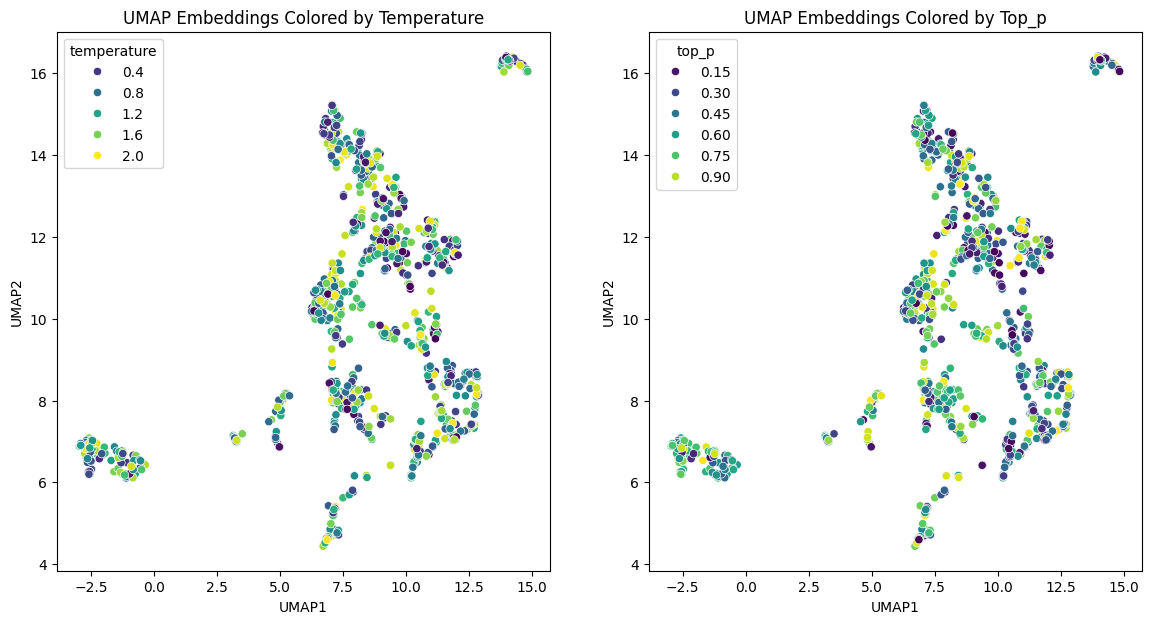

                UMAP1     UMAP2  temperature     top_p  token_count  \
UMAP1        1.000000  0.411821    -0.069941 -0.151038    -0.031592   
UMAP2        0.411821  1.000000    -0.063310 -0.123738     0.314424   
temperature -0.069941 -0.063310     1.000000  0.005887    -0.009727   
top_p       -0.151038 -0.123738     0.005887  1.000000     0.033406   
token_count -0.031592  0.314424    -0.009727  0.033406     1.000000   
max_tokens  -0.037575  0.292332    -0.001224  0.052444     0.925291   

             max_tokens  
UMAP1         -0.037575  
UMAP2          0.292332  
temperature   -0.001224  
top_p          0.052444  
token_count    0.925291  
max_tokens     1.000000  


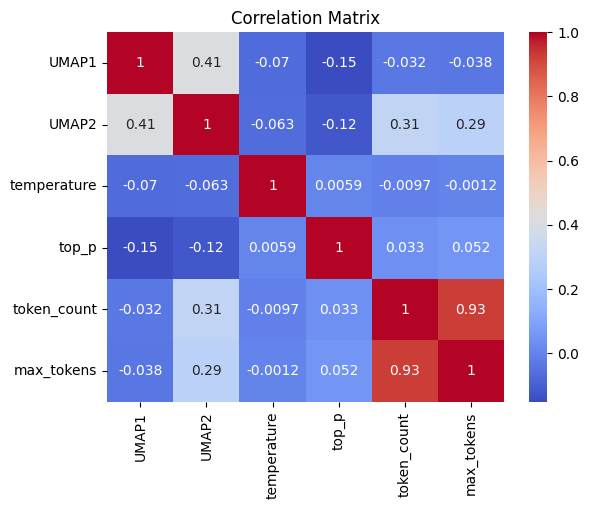

Regression results for UMAP1:
                            OLS Regression Results                            
Dep. Variable:                  UMAP1   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7.289
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           8.72e-06
Time:                        19:09:59   Log-Likelihood:                -2799.9
No. Observations:                1000   AIC:                             5610.
Df Residuals:                     995   BIC:                             5634.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.92

In [25]:
# Import necessary libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

data_dir = f"data/{experiment_name}"

# Initialize lists to store the data
umap1, umap2 = [], []
temperatures, top_ps, token_counts, max_tokens = [], [], [], []

# Iterate through each step directory to load data
for step in sorted(os.listdir(data_dir)):
    step_dir = os.path.join(data_dir, step)
    if os.path.isdir(step_dir):
        umap_data_file = os.path.join(step_dir, 'umap_data.json')
        step_config_file = os.path.join(step_dir, 'step_config.json')
        uuid_response_file = os.path.join(step_dir, 'uuid_response_list.json')

        if os.path.exists(umap_data_file) and os.path.exists(step_config_file) and os.path.exists(uuid_response_file):
            # Load UMAP data
            with open(umap_data_file, 'r') as f:
                umap_data = json.load(f)
            umap_embeddings = np.array(umap_data['embeddings'])
            
            # Load step configuration data
            with open(step_config_file, 'r') as f:
                step_config = json.load(f)
            
            # Load UUID response data
            with open(uuid_response_file, 'r') as f:
                uuid_responses = json.load(f)
            
            # Append data to lists
            for i in range(len(umap_embeddings)):
                umap1.append(umap_embeddings[i][0])
                umap2.append(umap_embeddings[i][1])
                response_config = uuid_responses[i]['configuration']
                temperatures.append(response_config['temperature'])
                top_ps.append(response_config['top_p'])
                max_tokens.append(response_config['max_tokens'])
                token_counts.append(len(uuid_responses[i]['response_content'].split()))

# Create a DataFrame
data = pd.DataFrame({
    'UMAP1': umap1,
    'UMAP2': umap2,
    'temperature': temperatures,
    'top_p': top_ps,
    'token_count': token_counts,
    'max_tokens': max_tokens
})

# Visualize the data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='temperature', data=data, palette='viridis')
plt.title('UMAP Embeddings Colored by Temperature')
plt.subplot(1, 2, 2)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='top_p', data=data, palette='viridis')
plt.title('UMAP Embeddings Colored by Top_p')
plt.show()

# Calculate the correlation matrix
correlation_matrix = data[['UMAP1', 'UMAP2', 'temperature', 'top_p', 'token_count', 'max_tokens']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression Analysis
X = data[['temperature', 'top_p', 'token_count', 'max_tokens']]
X = sm.add_constant(X)  # Adds a constant term to the predictors
y_umap1 = data['UMAP1']
y_umap2 = data['UMAP2']

model_umap1 = sm.OLS(y_umap1, X).fit()
model_umap2 = sm.OLS(y_umap2, X).fit()

print("Regression results for UMAP1:")
print(model_umap1.summary())
print("\nRegression results for UMAP2:")
print(model_umap2.summary())


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


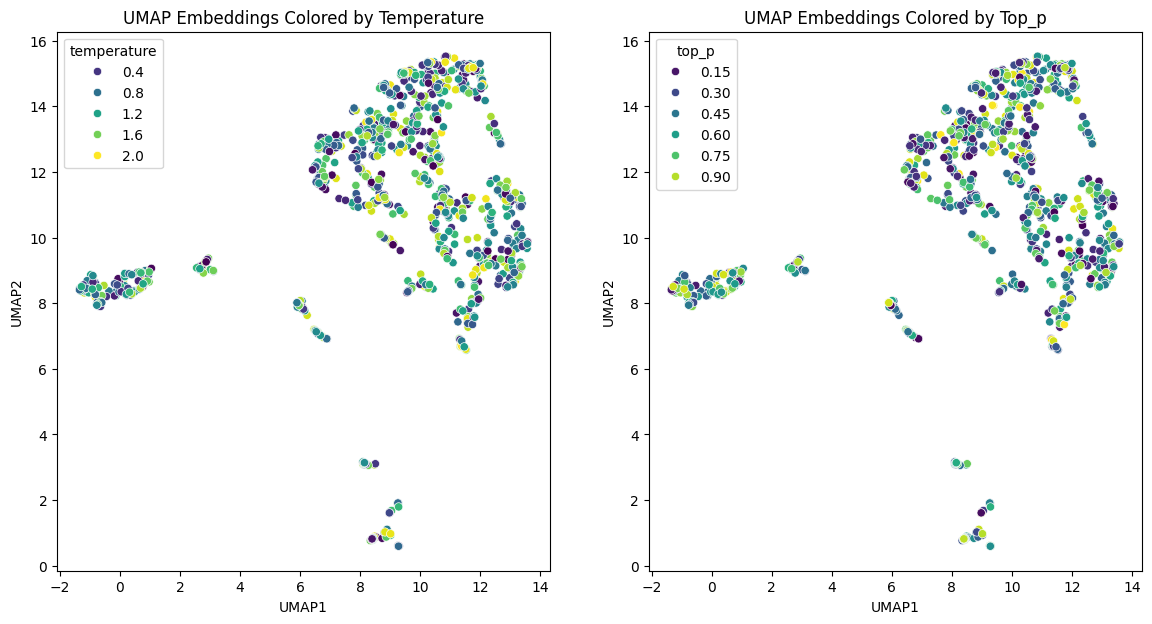

                UMAP1     UMAP2  temperature     top_p  token_count  \
UMAP1        1.000000  0.244263     0.025163 -0.029948    -0.003098   
UMAP2        0.244263  1.000000    -0.010443  0.036815     0.018454   
temperature  0.025163 -0.010443     1.000000  0.015812    -0.012356   
top_p       -0.029948  0.036815     0.015812  1.000000     0.068051   
token_count -0.003098  0.018454    -0.012356  0.068051     1.000000   
max_tokens  -0.011199  0.022521    -0.008000  0.089703     0.924074   

             max_tokens  
UMAP1         -0.011199  
UMAP2          0.022521  
temperature   -0.008000  
top_p          0.089703  
token_count    0.924074  
max_tokens     1.000000  


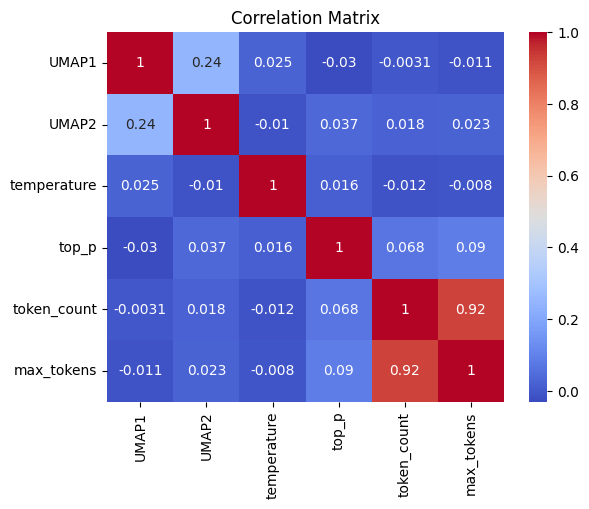

Regression results for UMAP1:
                            OLS Regression Results                            
Dep. Variable:                  UMAP1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4868
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.745
Time:                        19:10:09   Log-Likelihood:                -2739.1
No. Observations:                1000   AIC:                             5488.
Df Residuals:                     995   BIC:                             5513.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.75

In [26]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import umap.umap_ as umap

data_dir = f"data/{experiment_name}"

# Initialize lists to store the data
umap1, umap2 = [], []
temperatures, top_ps, token_counts, max_tokens = [], [], [], []
embeddings_list = []

# Iterate through each step directory to load data
for step in sorted(os.listdir(data_dir)):
    step_dir = os.path.join(data_dir, step)
    if os.path.isdir(step_dir):
        step_config_file = os.path.join(step_dir, 'step_config.json')
        uuid_response_file = os.path.join(step_dir, 'uuid_response_list.json')

        if os.path.exists(step_config_file) and os.path.exists(uuid_response_file):
            # Load step configuration data
            with open(step_config_file, 'r') as f:
                step_config = json.load(f)
            
            # Load UUID response data
            with open(uuid_response_file, 'r') as f:
                uuid_responses = json.load(f)

            # Collecting embedding data
            embeddings_dir = os.path.join(step_dir, 'embeddings')
            if os.path.exists(embeddings_dir):
                for embed_file in os.listdir(embeddings_dir):
                    with open(os.path.join(embeddings_dir, embed_file), 'r') as f:
                        embed_data = json.load(f)
                        for embedding_entry in embed_data['embeddings']:
                            embeddings_list.append(embedding_entry['embedding'])
                            response_uuid = embed_data['uuid']

                            # Find the corresponding configuration from uuid_responses
                            for response in uuid_responses:
                                if response['uuid'] == response_uuid:
                                    response_config = response['configuration']
                                    temperatures.append(response_config['temperature'])
                                    top_ps.append(response_config['top_p'])
                                    max_tokens.append(response_config['max_tokens'])
                                    token_counts.append(len(response['response_content'].split()))
                                    break

# Convert embeddings to a NumPy array
# Ensure all embeddings have the same dimension
embedding_length = len(embeddings_list[0])
embeddings_list = [embedding for embedding in embeddings_list if len(embedding) == embedding_length]
embeddings = np.array(embeddings_list)

# Normalize embeddings
embeddings = (embeddings - embeddings.mean(axis=0)) / embeddings.std(axis=0)

# Perform UMAP
n_neighbors = max(2, min(15, len(embeddings) - 1))  # Ensure n_neighbors is at least 2
reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.1, random_state=42)
umap_results = reducer.fit_transform(embeddings)

# Create a DataFrame with UMAP results and hyperparameters
data = pd.DataFrame({
    'UMAP1': umap_results[:, 0],
    'UMAP2': umap_results[:, 1],
    'temperature': temperatures[:len(umap_results)],
    'top_p': top_ps[:len(umap_results)],
    'token_count': token_counts[:len(umap_results)],
    'max_tokens': max_tokens[:len(umap_results)]
})

# Visualize the data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='temperature', data=data, palette='viridis')
plt.title('UMAP Embeddings Colored by Temperature')
plt.subplot(1, 2, 2)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='top_p', data=data, palette='viridis')
plt.title('UMAP Embeddings Colored by Top_p')
plt.show()

# Calculate the correlation matrix
correlation_matrix = data[['UMAP1', 'UMAP2', 'temperature', 'top_p', 'token_count', 'max_tokens']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression Analysis
X = data[['temperature', 'top_p', 'token_count', 'max_tokens']]
X = sm.add_constant(X)  # Adds a constant term to the predictors
y_umap1 = data['UMAP1']
y_umap2 = data['UMAP2']

model_umap1 = sm.OLS(y_umap1, X).fit()
model_umap2 = sm.OLS(y_umap2, X).fit()

print("Regression results for UMAP1:")
print(model_umap1.summary())
print("\nRegression results for UMAP2:")
print(model_umap2.summary())


Comparing close UMAP points:
Pair (11, 236):
Text 1: As a time traveler visiting Earth in the year 3000, one of the most surprising changes I notice is the advancement in technology, particularly in the field of artificial intelligence and robotics. The impact of this technological progress on society is profound and far-reaching.

In the year 3000, AI and robots have become an integral part of everyday life. They are no longer limited to performing repetitive tasks or manual labor but have evolved to possess advanced cognitive abilities and emotional intelligence. Robots now serve as companions, caregivers, educators, and even decision-makers in various aspects of society.

The widespread integration of AI and robots has significantly transformed the way people live and work. With the help of intelligent machines, humans have been able to achieve unprecedented levels of efficiency and productivity. Tasks that were once time-consuming and labor-intensive are now completed in a fraction

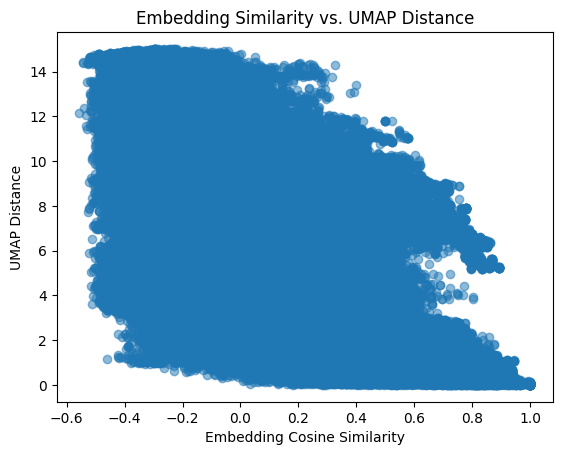

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import jaccard
from difflib import SequenceMatcher

# Define a function to compare texts
def compare_texts(text1, text2):
    tfidf = TfidfVectorizer().fit_transform([text1, text2])
    cosine_sim = cosine_similarity(tfidf)[0, 1]
    sequence_sim = SequenceMatcher(None, text1, text2).ratio()
    return cosine_sim, sequence_sim

# Identify pairs of UMAP points that are extremely close
threshold_distance = 0.01  # Adjust this threshold based on your data
close_pairs = []
for i in range(len(umap_results)):
    for j in range(i + 1, len(umap_results)):
        distance = np.linalg.norm(umap_results[i] - umap_results[j])
        if distance < threshold_distance:
            close_pairs.append((i, j))

# Compare close pairs of text embeddings and original text
print("Comparing close UMAP points:")
for idx, (i, j) in enumerate(close_pairs[:5]):  # Print only a few examples
    print(f"Pair ({i}, {j}):")
    print(f"Text 1: {data.loc[i, 'original_text']}")
    print(f"Text 2: {data.loc[j, 'original_text']}")
    cosine_sim, sequence_sim = compare_texts(data.loc[i, 'original_text'], data.loc[j, 'original_text'])
    embedding_cosine_sim = cosine_similarity([embeddings[i]], [embeddings[j]])[0, 0]
    print(f"Text Cosine Similarity: {cosine_sim}")
    print(f"Text Sequence Similarity: {sequence_sim}")
    print(f"Embedding Cosine Similarity: {embedding_cosine_sim}")
    print("")

# Calculate the cosine similarity matrix for embeddings
embedding_similarity_matrix = cosine_similarity(embeddings)

# Compare the similarity matrix with the UMAP distances
umap_distances = np.linalg.norm(umap_results[:, np.newaxis, :] - umap_results[np.newaxis, :, :], axis=-1)

# Flatten matrices for correlation
embedding_sim_flat = embedding_similarity_matrix[np.triu_indices_from(embedding_similarity_matrix, k=1)]
umap_dist_flat = umap_distances[np.triu_indices_from(umap_distances, k=1)]

# Calculate correlation
embedding_umap_correlation = np.corrcoef(embedding_sim_flat, umap_dist_flat)[0, 1]
print(f"Correlation between embedding similarities and UMAP distances: {embedding_umap_correlation}")

# Plot similarity vs. distance
plt.scatter(embedding_sim_flat, umap_dist_flat, alpha=0.5)
plt.xlabel('Embedding Cosine Similarity')
plt.ylabel('UMAP Distance')
plt.title('Embedding Similarity vs. UMAP Distance')
plt.show()


Comparing close UMAP points:
Pair (11, 236):
Text 1: As a time traveler visiting Earth in the year 3000, one of the most surprising changes I notice is the advancement in technology, particularly in the field of artificial intelligence and robotics. The impact of this technological progress on society is profound and far-reaching.

In the year 3000, AI and robots have become an integral part of everyday life. They are no longer limited to performing repetitive tasks or manual labor but have evolved to possess advanced cognitive abilities and emotional intelligence. Robots now serve as companions, caregivers, educators, and even decision-makers in various aspects of society.

The widespread integration of AI and robots has significantly transformed the way people live and work. With the help of intelligent machines, humans have been able to achieve unprecedented levels of efficiency and productivity. Tasks that were once time-consuming and labor-intensive are now completed in a fraction

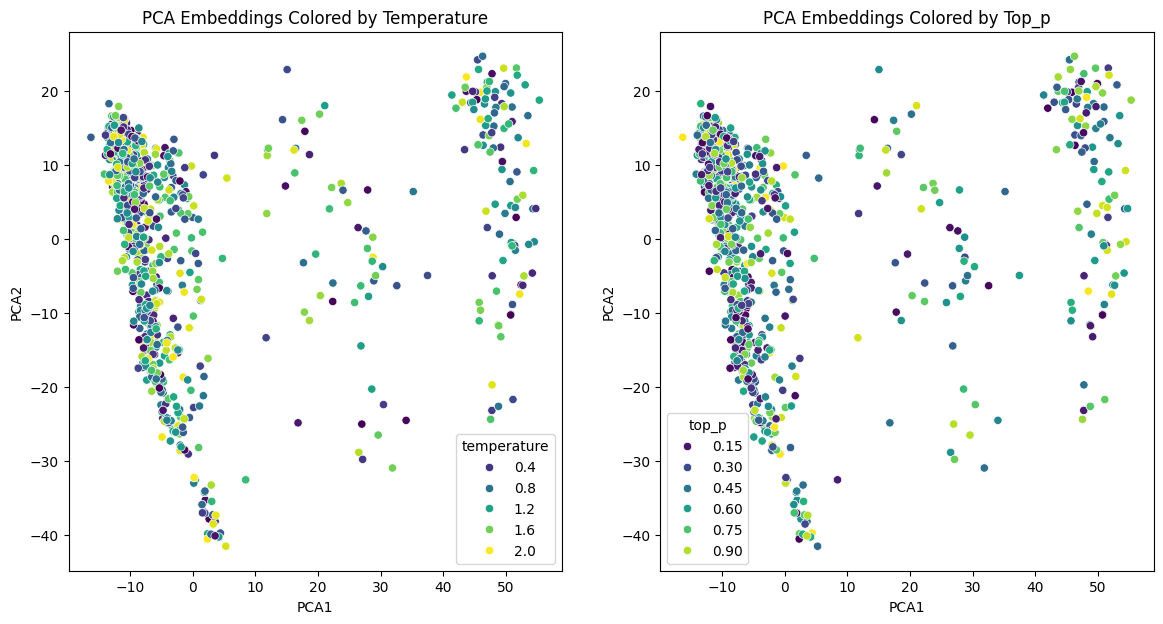

                     PCA1          PCA2  temperature     top_p  token_count  \
PCA1         1.000000e+00 -1.813867e-17    -0.005755  0.036563     0.004596   
PCA2        -1.813867e-17  1.000000e+00    -0.019616  0.045209    -0.001917   
temperature -5.754588e-03 -1.961640e-02     1.000000  0.015812    -0.012356   
top_p        3.656337e-02  4.520857e-02     0.015812  1.000000     0.068051   
token_count  4.596014e-03 -1.917462e-03    -0.012356  0.068051     1.000000   
max_tokens   5.506105e-03  2.271754e-02    -0.008000  0.089703     0.924074   

             max_tokens  
PCA1           0.005506  
PCA2           0.022718  
temperature   -0.008000  
top_p          0.089703  
token_count    0.924074  
max_tokens     1.000000  


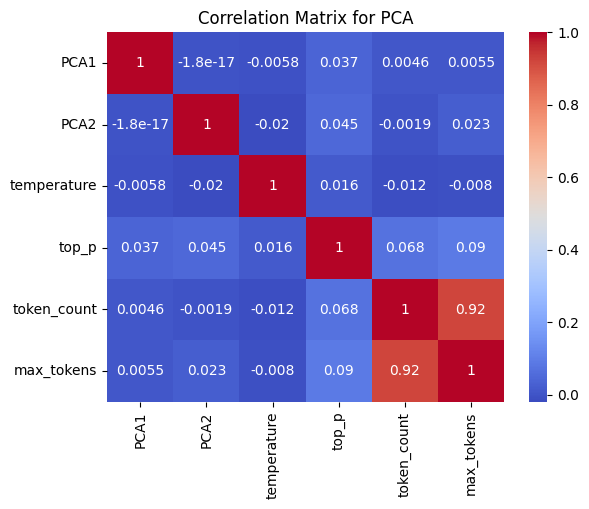

Regression results for PCA1:
                            OLS Regression Results                            
Dep. Variable:                   PCA1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3442
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.848
Time:                        19:14:26   Log-Likelihood:                -4337.4
No. Observations:                1000   AIC:                             8685.
Df Residuals:                     995   BIC:                             8709.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.237

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import jaccard
from difflib import SequenceMatcher
from sklearn.decomposition import PCA

# Define a function to compare texts using multiple similarity measures
def compare_texts(text1, text2):
    tfidf = TfidfVectorizer().fit_transform([text1, text2])
    cosine_sim = cosine_similarity(tfidf)[0, 1]
    sequence_sim = SequenceMatcher(None, text1, text2).ratio()
    return cosine_sim, sequence_sim

# Identify pairs of UMAP points that are extremely close
threshold_distance = 0.01  # Adjust this threshold based on your data
close_pairs = []
for i in range(len(umap_results)):
    for j in range(i + 1, len(umap_results)):
        distance = np.linalg.norm(umap_results[i] - umap_results[j])
        if distance < threshold_distance:
            close_pairs.append((i, j))

# Compare close pairs of text embeddings and original text
print("Comparing close UMAP points:")
for idx, (i, j) in enumerate(close_pairs[:5]):  # Print only a few examples
    print(f"Pair ({i}, {j}):")
    print(f"Text 1: {data.loc[i, 'original_text']}")
    print(f"Text 2: {data.loc[j, 'original_text']}")
    cosine_sim, sequence_sim = compare_texts(data.loc[i, 'original_text'], data.loc[j, 'original_text'])
    embedding_cosine_sim = cosine_similarity([embeddings[i]], [embeddings[j]])[0, 0]
    print(f"Text Cosine Similarity: {cosine_sim}")
    print(f"Text Sequence Similarity: {sequence_sim}")
    print(f"Embedding Cosine Similarity: {embedding_cosine_sim}")
    print("")

# Perform PCA for comparison with UMAP
pca = PCA(n_components=2)
pca_results = pca.fit_transform(embeddings)

# Create a DataFrame with PCA results
pca_data = pd.DataFrame({
    'PCA1': pca_results[:, 0],
    'PCA2': pca_results[:, 1],
    'temperature': temperatures[:len(pca_results)],
    'top_p': top_ps[:len(pca_results)],
    'token_count': token_counts[:len(pca_results)],
    'max_tokens': max_tokens[:len(pca_results)]
})

# Visualize the PCA results
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='temperature', data=pca_data, palette='viridis')
plt.title('PCA Embeddings Colored by Temperature')
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='top_p', data=pca_data, palette='viridis')
plt.title('PCA Embeddings Colored by Top_p')
plt.show()

# Calculate the correlation matrix for PCA
correlation_matrix_pca = pca_data[['PCA1', 'PCA2', 'temperature', 'top_p', 'token_count', 'max_tokens']].corr()
print(correlation_matrix_pca)
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for PCA')
plt.show()

# Regression Analysis for PCA
X_pca = pca_data[['temperature', 'top_p', 'token_count', 'max_tokens']]
X_pca = sm.add_constant(X_pca)  # Adds a constant term to the predictors
y_pca1 = pca_data['PCA1']
y_pca2 = pca_data['PCA2']

model_pca1 = sm.OLS(y_pca1, X_pca).fit()
model_pca2 = sm.OLS(y_pca2, X_pca).fit()

print("Regression results for PCA1:")
print(model_pca1.summary())
print("\nRegression results for PCA2:")
print(model_pca2.summary())


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


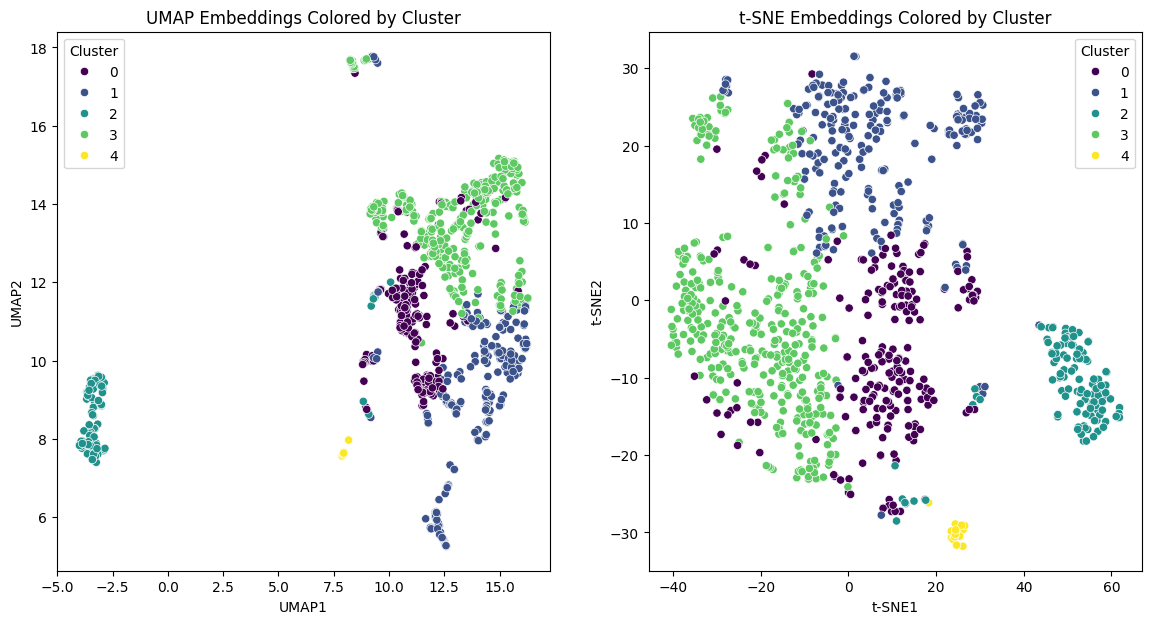

                UMAP1     UMAP2    t-SNE1    t-SNE2   Cluster  temperature  \
UMAP1        1.000000  0.323244 -0.762415  0.421463 -0.024667    -0.119617   
UMAP2        0.323244  1.000000 -0.817361 -0.142324  0.439072    -0.121589   
t-SNE1      -0.762415 -0.817361  1.000000 -0.165235 -0.363536     0.161103   
t-SNE2       0.421463 -0.142324 -0.165235  1.000000 -0.196684    -0.113574   
Cluster     -0.024667  0.439072 -0.363536 -0.196684  1.000000    -0.149888   
temperature -0.119617 -0.121589  0.161103 -0.113574 -0.149888     1.000000   
top_p       -0.342998 -0.289343  0.407529 -0.307774 -0.303319     0.005887   
token_count -0.112397  0.573963 -0.318907 -0.646514  0.354933    -0.009727   
max_tokens  -0.114965  0.526573 -0.284124 -0.632835  0.286125    -0.001224   

                top_p  token_count  max_tokens  
UMAP1       -0.342998    -0.112397   -0.114965  
UMAP2       -0.289343     0.573963    0.526573  
t-SNE1       0.407529    -0.318907   -0.284124  
t-SNE2      -0.307774  

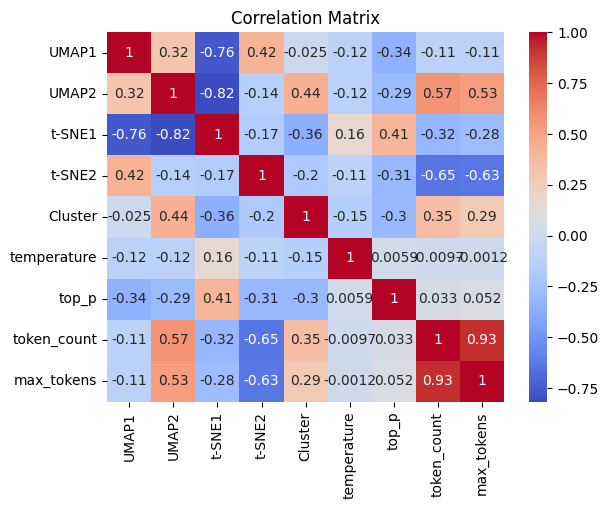

Regression results for UMAP1:
                            OLS Regression Results                            
Dep. Variable:                  UMAP1   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     41.16
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           5.93e-32
Time:                        19:15:34   Log-Likelihood:                -3022.1
No. Observations:                1000   AIC:                             6054.
Df Residuals:                     995   BIC:                             6079.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.18

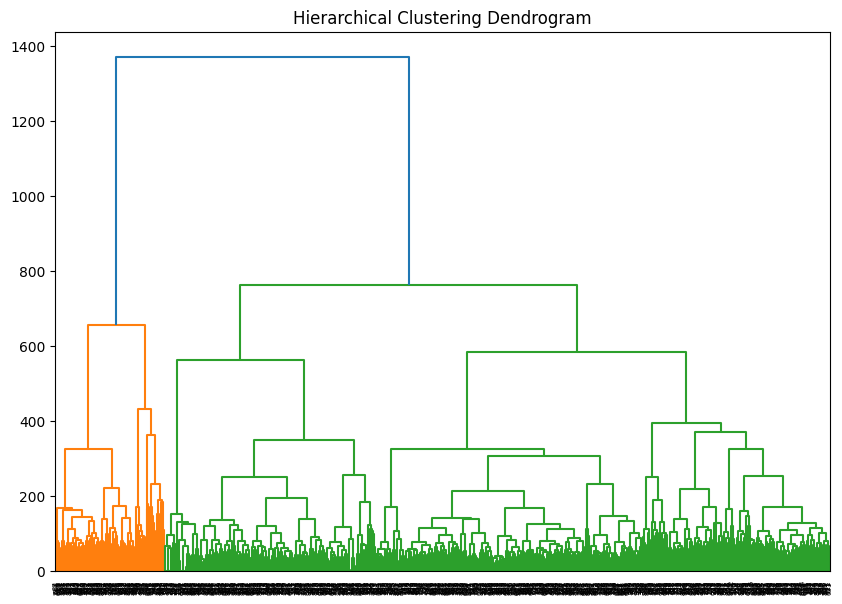

In [31]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import umap.umap_ as umap
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from difflib import SequenceMatcher
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

data_dir = f"data/{experiment_name}"

# Initialize lists to store the data
umap1, umap2 = [], []
temperatures, top_ps, token_counts, max_tokens = [], [], [], []
embeddings_list = []
original_texts = []
uuids = []

# Iterate through each step directory to load data
for step in sorted(os.listdir(data_dir)):
    step_dir = os.path.join(data_dir, step)
    if os.path.isdir(step_dir):
        step_config_file = os.path.join(step_dir, 'step_config.json')
        uuid_response_file = os.path.join(step_dir, 'uuid_response_list.json')

        if os.path.exists(step_config_file) and os.path.exists(uuid_response_file):
            # Load step configuration data
            with open(step_config_file, 'r') as f:
                step_config = json.load(f)
            
            # Load UUID response data
            with open(uuid_response_file, 'r') as f:
                uuid_responses = json.load(f)

            # Collecting embedding data
            embeddings_dir = os.path.join(step_dir, 'embeddings')
            if os.path.exists(embeddings_dir):
                for embed_file in os.listdir(embeddings_dir):
                    with open(os.path.join(embeddings_dir, embed_file), 'r') as f:
                        embed_data = json.load(f)
                        embeddings_combined = []
                        for embedding_entry in embed_data['embeddings']:
                            embeddings_combined.extend(embedding_entry['embedding'])
                        embeddings_list.append(embeddings_combined)
                        response_uuid = embed_data['uuid']

                        # Find the corresponding configuration from uuid_responses
                        for response in uuid_responses:
                            if response['uuid'] == response_uuid:
                                response_config = response['configuration']
                                temperatures.append(response_config['temperature'])
                                top_ps.append(response_config['top_p'])
                                max_tokens.append(response_config['max_tokens'])
                                token_counts.append(len(response['response_content'].split()))
                                original_texts.append(response['response_content'])
                                uuids.append(response_uuid)
                                break

# Convert embeddings to a NumPy array
embedding_length = len(embeddings_list[0])
embeddings_list = [embedding for embedding in embeddings_list if len(embedding) == embedding_length]
embeddings = np.array(embeddings_list)

# Normalize embeddings
embeddings = (embeddings - embeddings.mean(axis=0)) / embeddings.std(axis=0)

# Perform UMAP
n_neighbors = max(2, min(15, len(embeddings) - 1))  # Ensure n_neighbors is at least 2
reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.1, random_state=42)
umap_results = reducer.fit_transform(embeddings)

# Perform t-SNE
tsne_results = TSNE(n_components=2, random_state=42).fit_transform(embeddings)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(embeddings)
cluster_labels = kmeans.labels_

# Create a DataFrame with UMAP and t-SNE results and hyperparameters
data = pd.DataFrame({
    'UMAP1': umap_results[:, 0],
    'UMAP2': umap_results[:, 1],
    't-SNE1': tsne_results[:, 0],
    't-SNE2': tsne_results[:, 1],
    'Cluster': cluster_labels,
    'temperature': temperatures[:len(umap_results)],
    'top_p': top_ps[:len(umap_results)],
    'token_count': token_counts[:len(umap_results)],
    'max_tokens': max_tokens[:len(umap_results)],
    'original_text': original_texts[:len(umap_results)],
    'uuid': uuids[:len(umap_results)]
})

# Visualize the data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=data, palette='viridis')
plt.title('UMAP Embeddings Colored by Cluster')
plt.subplot(1, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', data=data, palette='viridis')
plt.title('t-SNE Embeddings Colored by Cluster')
plt.show()

# Calculate the correlation matrix
correlation_matrix = data[['UMAP1', 'UMAP2', 't-SNE1', 't-SNE2', 'Cluster', 'temperature', 'top_p', 'token_count', 'max_tokens']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression Analysis for UMAP
X_umap = data[['temperature', 'top_p', 'token_count', 'max_tokens']]
X_umap = sm.add_constant(X_umap)  # Adds a constant term to the predictors
y_umap1 = data['UMAP1']
y_umap2 = data['UMAP2']

model_umap1 = sm.OLS(y_umap1, X_umap).fit()
model_umap2 = sm.OLS(y_umap2, X_umap).fit()

print("Regression results for UMAP1:")
print(model_umap1.summary())
print("\nRegression results for UMAP2:")
print(model_umap2.summary())

# Regression Analysis for t-SNE
X_tsne = data[['temperature', 'top_p', 'token_count', 'max_tokens']]
X_tsne = sm.add_constant(X_tsne)  # Adds a constant term to the predictors
y_tsne1 = data['t-SNE1']
y_tsne2 = data['t-SNE2']

model_tsne1 = sm.OLS(y_tsne1, X_tsne).fit()
model_tsne2 = sm.OLS(y_tsne2, X_tsne).fit()

print("Regression results for t-SNE1:")
print(model_tsne1.summary())
print("\nRegression results for t-SNE2:")
print(model_tsne2.summary())

# Hierarchical Clustering
linked = linkage(embeddings, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


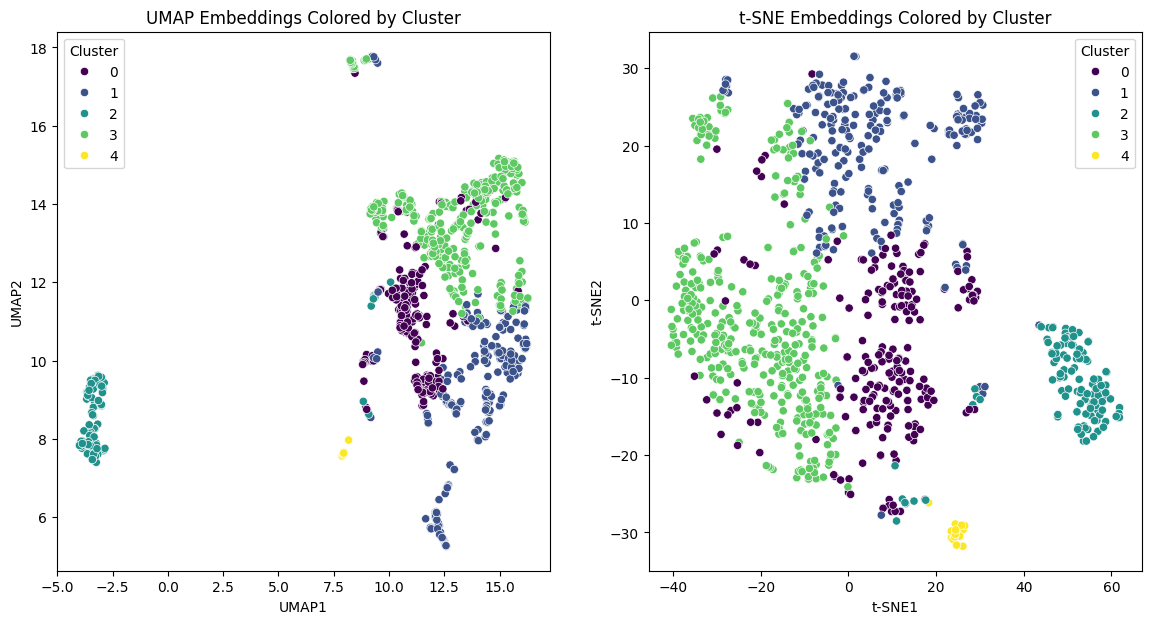

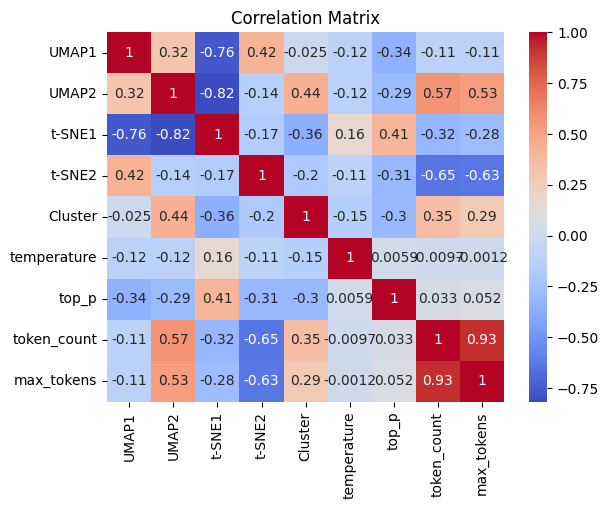

Text similarity between UUID a16530b8-877e-4be8-b629-15a7bb8f7e18 and UUID 2acfba1b-249b-425f-9fb0-3577014843d0: 1.00
Text 1: As a time traveler visiting Earth in the year 3000, one of the most surprising changes I notice is the advancement of technology in the form of widespread use of artificial intelligence (AI) in all aspects of society. AI has become so integrated into daily life that it has transformed the way people work, communicate, and interact with the world around them
Text 2: As a time traveler visiting Earth in the year 3000, one of the most surprising changes I notice is the advancement of technology in the form of widespread use of artificial intelligence (AI) in all aspects of society. AI has become so integrated into daily life that it has transformed the way people work, communicate, and interact with the world around them
-----
Text similarity between UUID a16530b8-877e-4be8-b629-15a7bb8f7e18 and UUID ed8d057c-dc3a-47b2-b607-badf172b7a1c: 1.00
Text 1: As a time trav

In [36]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import umap.umap_ as umap
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from difflib import SequenceMatcher
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

data_dir = f"data/{experiment_name}"

# Initialize lists to store the data
umap1, umap2 = [], []
temperatures, top_ps, token_counts, max_tokens = [], [], [], []
embeddings_list = []
original_texts = []
uuids = []

# Iterate through each step directory to load data
for step in sorted(os.listdir(data_dir)):
    step_dir = os.path.join(data_dir, step)
    if os.path.isdir(step_dir):
        step_config_file = os.path.join(step_dir, 'step_config.json')
        uuid_response_file = os.path.join(step_dir, 'uuid_response_list.json')

        if os.path.exists(step_config_file) and os.path.exists(uuid_response_file):
            # Load step configuration data
            with open(step_config_file, 'r') as f:
                step_config = json.load(f)
            
            # Load UUID response data
            with open(uuid_response_file, 'r') as f:
                uuid_responses = json.load(f)

            # Collecting embedding data
            embeddings_dir = os.path.join(step_dir, 'embeddings')
            if os.path.exists(embeddings_dir):
                for embed_file in os.listdir(embeddings_dir):
                    with open(os.path.join(embeddings_dir, embed_file), 'r') as f:
                        embed_data = json.load(f)
                        combined_embedding = np.concatenate(
                            [embedding_entry['embedding'] for embedding_entry in embed_data['embeddings']],
                            axis=None
                        )
                        embeddings_list.append(combined_embedding)
                        response_uuid = embed_data['uuid']

                        # Find the corresponding configuration from uuid_responses
                        for response in uuid_responses:
                            if response['uuid'] == response_uuid:
                                response_config = response['configuration']
                                temperatures.append(response_config['temperature'])
                                top_ps.append(response_config['top_p'])
                                max_tokens.append(response_config['max_tokens'])
                                token_counts.append(len(response['response_content'].split()))
                                original_texts.append(response['response_content'])
                                uuids.append(response_uuid)
                                break

# Convert embeddings to a NumPy array
embedding_length = len(embeddings_list[0])
embeddings_list = [embedding for embedding in embeddings_list if len(embedding) == embedding_length]
embeddings = np.array(embeddings_list)

# Normalize embeddings
embeddings = (embeddings - embeddings.mean(axis=0)) / embeddings.std(axis=0)

# Perform UMAP
n_neighbors = max(2, min(15, len(embeddings) - 1))  # Ensure n_neighbors is at least 2
reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.1, random_state=42)
umap_results = reducer.fit_transform(embeddings)

# Perform t-SNE
tsne_results = TSNE(n_components=2, random_state=42).fit_transform(embeddings)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(embeddings)
cluster_labels = kmeans.labels_

# Create a DataFrame with UMAP and t-SNE results and hyperparameters
data = pd.DataFrame({
    'UMAP1': umap_results[:, 0],
    'UMAP2': umap_results[:, 1],
    't-SNE1': tsne_results[:, 0],
    't-SNE2': tsne_results[:, 1],
    'Cluster': cluster_labels,
    'temperature': temperatures[:len(umap_results)],
    'top_p': top_ps[:len(umap_results)],
    'token_count': token_counts[:len(umap_results)],
    'max_tokens': max_tokens[:len(umap_results)],
    'original_text': original_texts[:len(umap_results)],
    'uuid': uuids[:len(umap_results)]
})

# Visualize the data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=data, palette='viridis')
plt.title('UMAP Embeddings Colored by Cluster')
plt.subplot(1, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', data=data, palette='viridis')
plt.title('t-SNE Embeddings Colored by Cluster')
plt.show()

# Calculate the correlation matrix
correlation_matrix = data[['UMAP1', 'UMAP2', 't-SNE1', 't-SNE2', 'Cluster', 'temperature', 'top_p', 'token_count', 'max_tokens']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Text Similarity Analysis
def text_similarity(text1, text2):
    return SequenceMatcher(None, text1, text2).ratio()

# Comparing close UMAP points
umap_distances = np.sqrt((umap_results[:, 0][:, np.newaxis] - umap_results[:, 0]) ** 2 + (umap_results[:, 1][:, np.newaxis] - umap_results[:, 1]) ** 2)
close_points = np.where((umap_distances < 0.1) & (umap_distances > 0))

text_similarity_results = []
for i, j in zip(close_points[0], close_points[1]):
    sim = text_similarity(data.loc[i, 'original_text'], data.loc[j, 'original_text'])
    text_similarity_results.append((i, j, sim))

# Sort by similarity and print two examples
text_similarity_results = sorted(text_similarity_results, key=lambda x: x[2], reverse=True)
for k in range(2):
    i, j, sim = text_similarity_results[k]
    print(f"Text similarity between UUID {data.loc[i, 'uuid']} and UUID {data.loc[j, 'uuid']}: {sim:.2f}")
    print(f"Text 1: {data.loc[i, 'original_text']}")
    print(f"Text 2: {data.loc[j, 'original_text']}")
    print("-----")

# Summary of text similarity findings
similarities = [result[2] for result in text_similarity_results]
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)
outliers = [result for result in text_similarity_results if result[2] < mean_similarity - 2 * std_similarity or result[2] > mean_similarity + 2 * std_similarity]

print(f"Mean text similarity: {mean_similarity:.2f}")
print(f"Standard deviation of text similarity: {std_similarity:.2f}")
print(f"Number of outliers: {len(outliers)}")

# Save data for further analysis
data.to_csv('combined_embeddings_analysis.csv', index=False)


In [45]:
experiment_name = "test6_all_timeprompt_gpt3.5_1000"

In [46]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
import torch
import umap.umap_ as umap
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from difflib import SequenceMatcher

# Function to calculate perplexity
def calculate_perplexity(texts, model, tokenizer):
    perplexities = []
    for text in texts:
        input_ids = tokenizer.encode(text, return_tensors='pt').to('cuda')
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
            perplexity = torch.exp(loss).item()
            perplexities.append(perplexity)
    return perplexities

# Function to calculate cosine similarity
def calculate_cosine_similarity(texts):
    vectorizer = TfidfVectorizer().fit_transform(texts)
    vectors = vectorizer.toarray()
    cosine_similarities = []
    for i in range(len(vectors)):
        for j in range(i + 1, len(vectors)):
            similarity = np.dot(vectors[i], vectors[j]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[j]))
            cosine_similarities.append(similarity)
    return cosine_similarities

# Function to calculate edit distance
def calculate_edit_distance(text1, text2):
    return SequenceMatcher(None, text1, text2).ratio()

# Function to normalize edit distance
def calculate_normalized_edit_distance(texts):
    edit_distances = []
    for i in range(len(texts)):
        for j in range(i + 1, len(texts)):
            distance = calculate_edit_distance(texts[i], texts[j])
            edit_distances.append(distance)
    return edit_distances

data_dir = f"data/{experiment_name}"

# Initialize lists to store the data
original_texts = []
temperatures = []

# Iterate through each step directory to load data
for step in sorted(os.listdir(data_dir)):
    step_dir = os.path.join(data_dir, step)
    if os.path.isdir(step_dir):
        step_config_file = os.path.join(step_dir, 'step_config.json')
        uuid_response_file = os.path.join(step_dir, 'uuid_response_list.json')

        if os.path.exists(step_config_file) and os.path.exists(uuid_response_file):
            # Load step configuration data
            with open(step_config_file, 'r') as f:
                step_config = json.load(f)
            
            # Load UUID response data
            with open(uuid_response_file, 'r') as f:
                uuid_responses = json.load(f)
            
            for response in uuid_responses:
                response_config = response['configuration']
                temperatures.append(response_config['temperature'])
                original_texts.append(response['response_content'])

# Load GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name).to('cuda')
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Calculate perplexity
perplexities = calculate_perplexity(original_texts, model, tokenizer)

# Calculate cosine similarity
cosine_similarities = calculate_cosine_similarity(original_texts)

# Calculate normalized edit distance
edit_distances = calculate_normalized_edit_distance(original_texts)

# Create DataFrame for analysis
data = pd.DataFrame({
    'temperature': temperatures,
    'perplexity': perplexities,
    'cosine_similarity': cosine_similarities,
    'edit_distance': edit_distances[:len(cosine_similarities)]  # Ensure same length for simplicity
})

# Categorize temperatures into bins
data['temperature_bin'] = pd.cut(data['temperature'], bins=[0, 0.5, 1.0, 1.5, 2.0, 2.5], labels=['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5'])

# Plotting
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='temperature_bin', y='perplexity', data=data, palette='viridis')
plt.title('Perplexity vs Temperature')

plt.subplot(1, 3, 2)
sns.boxplot(x='temperature_bin', y='cosine_similarity', data=data, palette='viridis')
plt.title('Cosine Similarity vs Temperature')

plt.subplot(1, 3, 3)
sns.boxplot(x='temperature_bin', y='edit_distance', data=data, palette='viridis')
plt.title('Edit Distance vs Temperature')

plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length